# Bandstructures of Haldane Model

In [1]:
# --------------------------------
# Band structure of Haldane model
# --------------------------------

from __future__ import print_function # python3 style print
from pythtb import * # import TB model class

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# set model parameters
delta=0.7   # site energy shift
t=-1.0      # real first-neighbor hopping
t2=0.15     # imaginary second-neighbor hopping

def set_model(delta,t,t2):
  lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
  orb=[[1./3.,1./3.],[2./3.,2./3.]]
  model=tb_model(2,2,lat,orb)
  model.set_onsite([-delta,delta])
  for lvec in ([ 0, 0], [-1, 0], [ 0,-1]):
    model.set_hop(t, 0, 1, lvec)
  for lvec in ([ 1, 0], [-1, 1], [ 0,-1]):
    model.set_hop(t2*1.j, 0, 0, lvec)
  for lvec in ([-1, 0], [ 1,-1], [ 0, 1]):
    model.set_hop(t2*1.j, 1, 1, lvec)
  return model

In [3]:
# construct path in k-space and solve model
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[1./3.,2./3.], [0.,0.]]
label=(r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')
(k_vec,k_dist,k_node)=set_model(delta,t,t2).k_path(path,101)

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.33333 0.66667]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.     ]
 [0.5     0.28868]
 [0.33333 0.57735]
 [0.      0.     ]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.33333  from  [0.5 0.5]  to  [0.33333 0.66667]
  length = 0.66667  from  [0.33333 0.66667]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.33333 2.     ]
node index list:    [  0  33  50  67 100]
----- k_path report end ------------



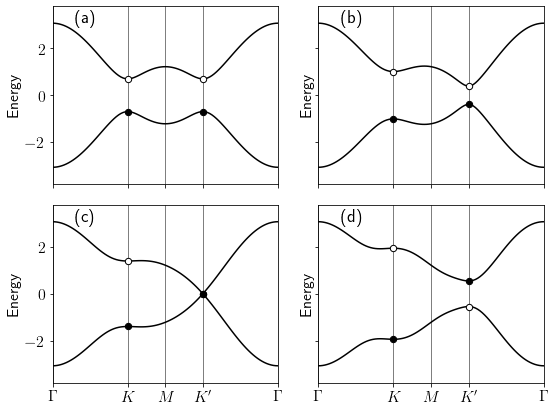

In [4]:
# set up band structure plots
fig, ax = plt.subplots(2,2,figsize=(8.,6.),sharex=True,sharey=True)
ax=ax.flatten()

t2_values=[0.,-0.06,-0.1347,-0.24]
labs=['(a)','(b)','(c)','(d)']
for j in range(4):

  my_model=set_model(delta,t,t2_values[j])
  evals=my_model.solve_all(k_vec)
  
  ax[j].set_xlim([0,k_node[-1]])
  ax[j].set_xticks(k_node)
  ax[j].set_xticklabels(label)
  for n in range(len(k_node)):
    ax[j].axvline(x=k_node[n],linewidth=0.5, color='k')
  ax[j].set_ylabel("Energy")
  ax[j].set_ylim(-3.8,3.8)
  for n in range(2):
    ax[j].plot(k_dist,evals[n],color='k')

  # filled or open dots at K and K' following band inversion
  for m in [1,3]:
    kk=k_node[m]
    (en,ev)=my_model.solve_one(path[m],eig_vectors=True)
    if np.abs(ev[0,0]) > np.abs(ev[0,1]):   #ev[band,orb]
      en=[en[1],en[0]]
    ax[j].scatter(kk,en[0],s=40.,marker='o',edgecolors='k',facecolors='w',zorder=4)
    ax[j].scatter(kk,en[1],s=40.,marker='o',color='k',zorder=6)

  ax[j].text(0.20,3.1,labs[j],size=18.)

# save figure as a PDF
fig.tight_layout()
#fig.savefig("haldane_bsr.pdf")

plt.show()